# Horror | EDA

**Questions:**

**Horror**
- 1. Top Horror films
- 2. Top Slasher, Paranormal, Monster, etc.
- 3. Top Horror Locations
- 4. Top Horror Franchises
- 5. Top Horror Music/Composers
- 6. Top Horror Movie Release Date (Years, Month. Quarter)
- 7. Top Horror Colorists/Editors/
- 8. Top Horror Make-Up Artists
- 9. Top Horror Costume Designers
- 10. Top Horror Gaffer
- 11. Top Horror Cinematographer
- 12. Top Horror Makers!(Studios/Production Companies)
- 13. Top Horror Actors
- 14. Top Horror Writers


All these questions can give insights to writers, directors, and producers to know who to hire based of of there needs and budget. Say I'm making a horror film and have a good amount in my budget set aside for Make-Up and Costumes (it's a zombie movie and it is vital the zombies look real and scary... it could make or break the film), having a list of known artists can be beneficial in reducing the amount of time scouting, casting, budgeting, and pre-production...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib_venn import venn2
from scipy.stats import norm
from scipy import stats
from ast import literal_eval
from typing import Dict, List
from collections import Counter
from matplotlib.pyplot import figure
import ast
import re
import json
import nltk
import re
import csv
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings; warnings.simplefilter('ignore')

## Highest Revenue Horror Films

In [2]:
horror_genre = pd.read_csv('../../data/processed/horror_genre.csv')

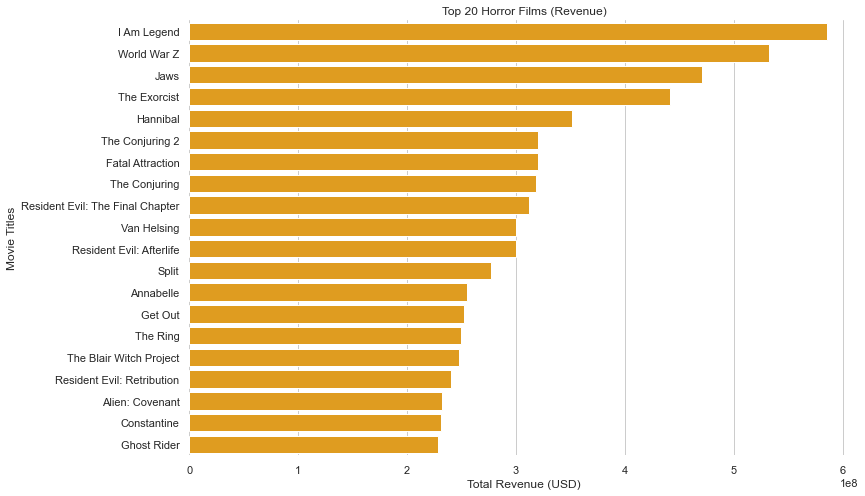

In [3]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Load revenue data
horror_top20 = horror_genre[['title', 'revenue']].sort_values(by = 'revenue', ascending = False).head(20)

# plot the highest revenue films
ax =sns.barplot(x='revenue', y='title', data=horror_top20,
            label="Total", color="orange", ax=ax)

# Add x and y axis labels
ax.set(ylabel="Movie Titles",
       xlabel="Total Revenue (USD)",
       title='Top 20 Horror Films (Revenue)')

sns.despine(left=True, bottom=True)

In [27]:
horror_tops = horror_genre[['title', 'revenue']].sort_values(by = 'revenue', ascending = False)
horror_tops.shape

(602, 2)

# Top Horror Filming Locations

In [35]:
horror_locations = pd.read_csv('../../data/processed/horror_locations.csv')

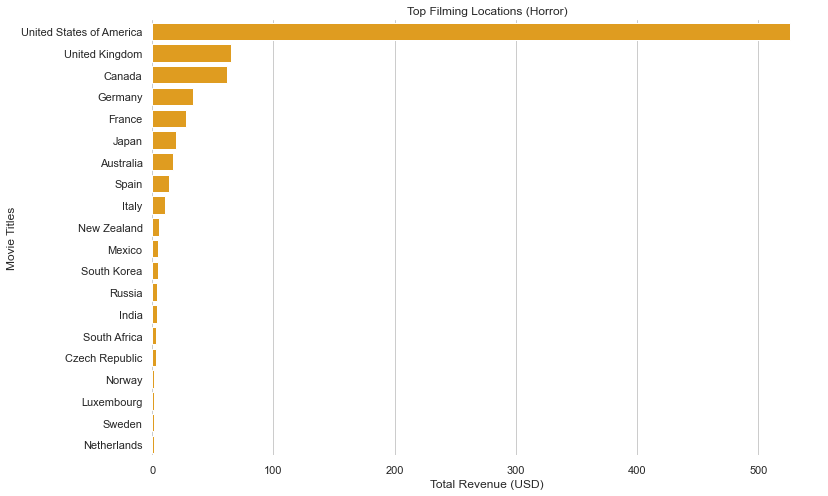

In [36]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Load horror location data
top_horror_locations = horror_locations.groupby(['location']).size().reset_index(name='counts').sort_values(by = "counts", ascending = False)
top_horror_locations = top_horror_locations[['location','counts']].sort_values(by = 'counts', ascending = False).head(20)

# plot the highest revenue films
ax =sns.barplot(x = 'counts', y = 'location',data=top_horror_locations,
            label="Total", color="orange", ax=ax)

# Add x and y axis labels
ax.set(ylabel="Movie Titles",
       xlabel="Total Revenue (USD)",
       title='Top Filming Locations (Horror)')

sns.despine(left=True, bottom=True)

# Top Horror Filming Companies

In [82]:
horror_companies = pd.read_csv('../../data/processed/horror_companies.csv')

In [83]:
horror_companies.head()

,id,title,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Romance,genre_Action,genre_Horror,...,genre_Mystery,genre_Fantasy,genre_Animation,genre_Foreign,genre_Music,genre_History,genre_War,genre_Western,genre_TV Movie,production_companies
0,12110.0,Dracula: Dead and Loving It,2,Comedy Horror,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Columbia Pictures
1,12110.0,Dracula: Dead and Loving It,2,Comedy Horror,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Castle Rock Entertainment
2,12110.0,Dracula: Dead and Loving It,2,Comedy Horror,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Enigma Pictures
3,755.0,From Dusk Till Dawn,4,Action Crime Horror Thriller,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,A Band Apart
4,755.0,From Dusk Till Dawn,4,Action Crime Horror Thriller,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Dimension Films


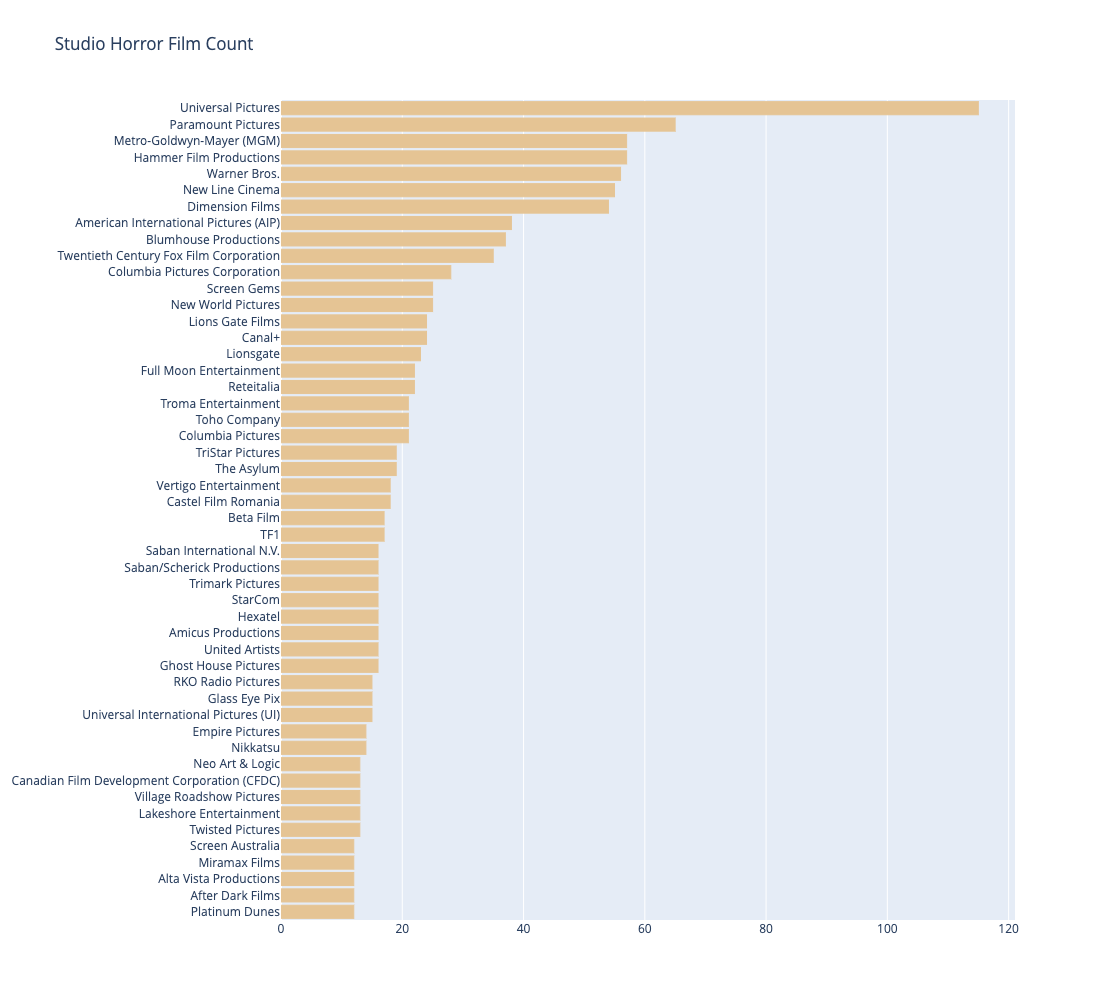

In [88]:
### import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
#fig = plt.subplots(figsize=(12, 8))

# Load horror location data
top_horror_companies = horror_companies.groupby(['production_companies']).size().reset_index(name='counts').sort_values(by = "counts", ascending = False)
top_horror_companies = top_horror_companies[['production_companies','counts']].sort_values(by = 'counts', ascending = False).head(50)
studio = top_horror_companies['production_companies']
count = top_horror_companies['counts']

fig = go.Figure()

fig.add_trace(go.Bar(
    y = studio,
    x = count,
    name = 'Studio',
    orientation='h',
    marker=dict(
        color='rgb(229, 196, 148)',
        line=dict(color='rgb(229, 196, 148)', width=1)
    )
)) 

fig.update_layout(
    title = "Studio Horror Film Count",
    autosize=False,
    width=1300,
    height=1000,
    yaxis=dict(
        titlefont=dict(size=30),
    )
)

# Change the bar mode
fig.update_yaxes(
    type="category",
    categoryorder="max ascending")
fig.update_yaxes(automargin=True)
fig.show()